In [ ]:
from deltalake import DeltaTable
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
four_wheels = lambda x, y: [f'{x}_rear_left_{y}', f'{x}_rear_right_{y}', f'{x}_front_left_{y}', f'{x}_front_right_{y}']

In [ ]:
def clean_df(df, type):
    df['brakes_temperature'] = df[four_wheels(type, 'brakes_temperature')].mean(axis=1)
    df['tyres_surface_temperature'] = df[four_wheels(type, 'tyres_surface_temperature')].mean(axis=1)
    df['tyres_inner_temperature'] = df[four_wheels(type, 'tyres_inner_temperature')].mean(axis=1)
    df['tyres_pressure'] = df[four_wheels(type, 'tyres_pressure')].mean(axis=1)
    df['tyresDamage'] = df[four_wheels(type, 'tyresDamage')].mean(axis=1)
    
    df.drop(
        [*four_wheels(type, 'brakes_temperature'), *four_wheels(type, 'tyres_surface_temperature'), *four_wheels(type, 'tyres_inner_temperature'), *four_wheels(type, 'tyres_pressure'), *four_wheels(type, 'tyresDamage')], inplace=True, axis=1
    )
    return df

In [ ]:
df = pd.read_parquet('./delta/lap_results/part-00000-f813030f-e90d-439c-aa61-c61a14fe0c92-c000.snappy.parquet')

In [ ]:
df['lap_time'] = df['end_lap'] - df['start_lap']
df = df[df['lap_time'] < 120]

In [ ]:
key_columns = ['driver', 'start_lap', 'end_lap', 'lap_time']

In [ ]:
mean_df = clean_df(df[key_columns + df.filter(regex='^mean_').columns.tolist()], 'mean')
stddev_df = clean_df(df[key_columns + df.filter(regex='^stddev_').columns.tolist()], 'stddev')
min_df = clean_df(df[key_columns + df.filter(regex='^min_').columns.tolist()], 'min')
max_df = clean_df(df[key_columns + df.filter(regex='^max_').columns.tolist()], 'max')

In [ ]:
tyre_consumption = max_df['tyresDamage'] - min_df['tyresDamage']
energy_deployed = max_df['max_ersDeployedThisLap']

In [ ]:
plt.scatter(min_df['lap_time'], tyre_consumption)
plt.xlabel('Lap Time (s)')
plt.ylabel('Tyre Consumption (%)')

In [ ]:
plt.scatter(min_df['lap_time'], energy_deployed)
plt.xlabel('Lap Time (s)')
plt.ylabel('Energy Deployed (%)')

In [53]:
df = pd.read_parquet('delta/segment_results/part-00000-a64af6c5-4589-4780-b600-ccd84c907a27-c000.snappy.parquet')
df

,driver,segment,start_segment,end_segment,start_lap,end_lap,mean_speed,mean_throttle,mean_steer,mean_brake,...,25th_percentile_front_left_tyresDamage,25th_percentile_front_right_tyresDamage,50th_percentile_rear_left_tyresDamage,50th_percentile_rear_right_tyresDamage,50th_percentile_front_left_tyresDamage,50th_percentile_front_right_tyresDamage,75th_percentile_rear_left_tyresDamage,75th_percentile_rear_right_tyresDamage,75th_percentile_front_left_tyresDamage,75th_percentile_front_right_tyresDamage
0,0,9.0,1540.067505,1544.171509,1488.466187,1563.273804,184.300000,0.392800,NaN,0.086578,...,5.0,5.0,8.0,8.0,5.0,5.0,9.0,8.0,5.0,5.0
1,0,9.0,3054.573730,3058.677734,3002.471924,3077.679932,180.275000,0.368279,NaN,0.099701,...,14.0,15.0,23.0,22.0,14.0,15.0,23.0,22.0,14.0,15.0
2,0,12.0,1852.728394,1857.416382,1787.513672,1866.825806,172.717391,0.451057,NaN,0.110273,...,9.0,10.0,15.0,15.0,9.0,10.0,15.0,15.0,9.0,10.0
3,1,13.0,2527.282715,2530.986328,2460.883301,2534.189697,173.555556,0.452805,NaN,0.075884,...,6.0,7.0,9.0,9.0,6.0,8.0,9.0,9.0,6.0,8.0
4,2,1.0,3242.577393,3250.968994,2337.694092,3245.680420,263.231707,0.740035,NaN,0.101255,...,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,18,3.0,3409.576416,3422.873047,3402.269287,3474.874756,237.704545,0.685026,NaN,0.100854,...,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
4567,18,4.0,1575.168945,1578.672485,1553.764404,1632.409302,73.941176,0.266594,NaN,0.018006,...,7.0,9.0,12.0,11.0,7.0,9.0,12.0,11.0,7.0,9.0
4568,18,5.0,3426.376465,3437.971436,3402.269287,3474.874756,225.200000,0.674158,NaN,0.095929,...,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0
4569,19,7.0,892.673767,894.175232,849.881287,924.371948,223.000000,0.968476,NaN,0.000000,...,6.0,8.0,10.0,10.0,6.0,8.0,10.0,10.0,6.0,8.0


In [54]:
df['lap_time'] = df['end_lap'] - df['start_lap']
df = df[df['lap_time'] < 80]

In [67]:
reduced_df = df[[
    'driver',
    'segment',
    'start_lap',
    'end_lap',
    'mean_speed',
    'lap_time',
    'min_rear_left_tyresDamage',
    'min_rear_right_tyresDamage',
    'min_front_left_tyresDamage',
    'min_front_right_tyresDamage',
    'max_rear_left_tyresDamage',
    'max_rear_right_tyresDamage',
    'max_front_left_tyresDamage',
    'max_front_right_tyresDamage',
]]

In [68]:
for i in ['rear_left', 'rear_right', 'front_left', 'front_right']:
    reduced_df[f'{i}_tyresDamage'] = reduced_df[f'max_{i}_tyresDamage'] - reduced_df[f'min_{i}_tyresDamage']

/var/folders/39/cs55k1492gsb818wts2_nqch0000gn/T/ipykernel_19381/3952297447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df[f'{i}_tyresDamage'] = reduced_df[f'max_{i}_tyresDamage'] - reduced_df[f'min_{i}_tyresDamage']
/var/folders/39/cs55k1492gsb818wts2_nqch0000gn/T/ipykernel_19381/3952297447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df[f'{i}_tyresDamage'] = reduced_df[f'max_{i}_tyresDamage'] - reduced_df[f'min_{i}_tyresDamage']
/var/folders/39/cs55k1492gsb818wts2_nqch0000gn

In [69]:
tyresDamage = reduced_df.groupby(['driver', 'segment'], as_index=False)[['rear_left_tyresDamage', 'rear_right_tyresDamage', 'front_left_tyresDamage', 'front_right_tyresDamage']].mean()

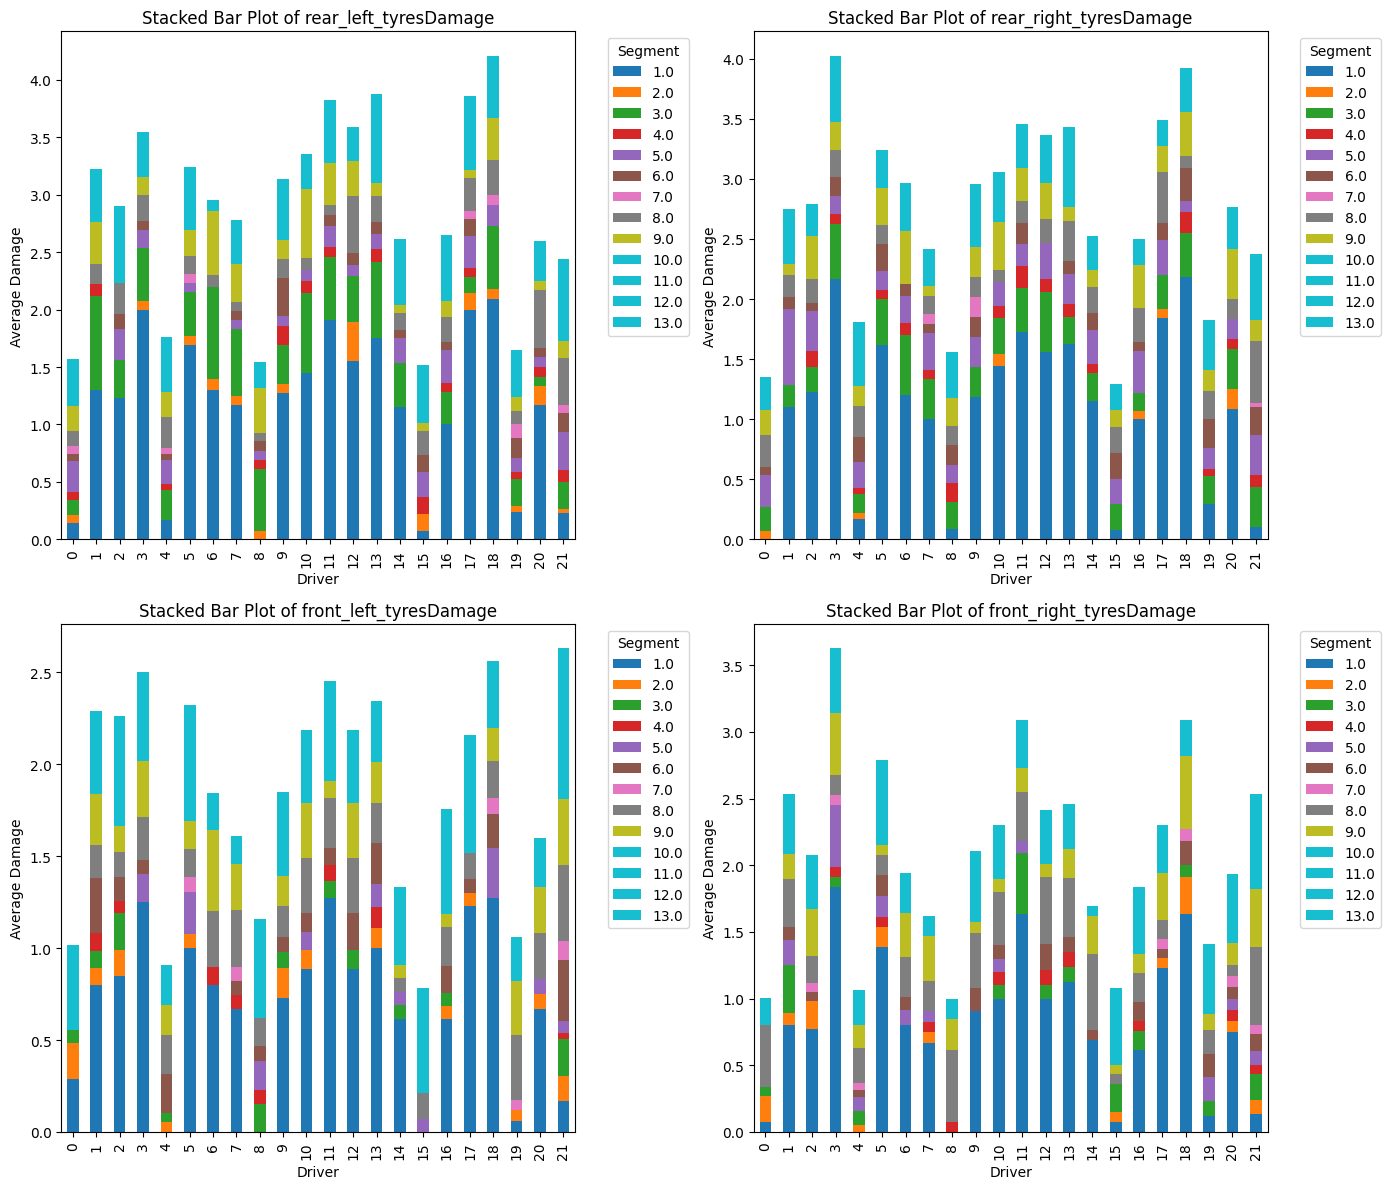

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
segments = tyresDamage['segment'].unique()
colors = plt.cm.tab10(range(len(segments)))
axs = axs.flatten()

columns = ['rear_left_tyresDamage', 'rear_right_tyresDamage', 'front_left_tyresDamage', 'front_right_tyresDamage']

for i, col in enumerate(columns):
    ax = axs[i]
    pivot_df = tyresDamage.pivot(index='driver', columns='segment', values=col).fillna(0)
    pivot_df.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_title(f'Stacked Bar Plot of {col}')
    ax.set_xlabel('Driver')
    ax.set_ylabel('Average Damage')
    ax.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [81]:
correlations_df = reduced_df[[
    'segment',
    'rear_left_tyresDamage',
    'rear_right_tyresDamage',
    'front_left_tyresDamage',
    'front_right_tyresDamage',
    'mean_speed'
]]
correlations_df['tyresDamage'] = correlations_df[['rear_left_tyresDamage',
    'rear_right_tyresDamage',
    'front_left_tyresDamage',
    'front_right_tyresDamage',
]].apply(lambda x: np.mean(x), axis=1)
correlations_df = correlations_df[['segment', 'tyresDamage', 'mean_speed']]

/var/folders/39/cs55k1492gsb818wts2_nqch0000gn/T/ipykernel_19381/75153711.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlations_df['tyresDamage'] = correlations_df[['rear_left_tyresDamage',


In [86]:
correlations_df.groupby('segment').corr()

tyresDamage  mean_speed
segment                                     
1.0     tyresDamage     1.000000   -0.910300
        mean_speed     -0.910300    1.000000
2.0     tyresDamage     1.000000    0.095344
        mean_speed      0.095344    1.000000
3.0     tyresDamage     1.000000    0.089033
        mean_speed      0.089033    1.000000
4.0     tyresDamage     1.000000    0.063674
        mean_speed      0.063674    1.000000
5.0     tyresDamage     1.000000   -0.122447
        mean_speed     -0.122447    1.000000
6.0     tyresDamage     1.000000    0.086267
        mean_speed      0.086267    1.000000
7.0     tyresDamage     1.000000   -0.201537
        mean_speed     -0.201537    1.000000
8.0     tyresDamage     1.000000   -0.011499
        mean_speed     -0.011499    1.000000
9.0     tyresDamage     1.000000    0.199536
        mean_speed      0.199536    1.000000
10.0    tyresDamage     1.000000    0.062435
        mean_speed      0.062435    1.000000
11.0    tyresDamage     1.000000   -0.152509
        mean_speed     -0.152509    1.000000
12.0    tyresDamage     1.000000    0.094236
        mean_speed      0.094236    1.000000
13.0    tyresDamage     1.000000    0.131430
        mean_speed      0.131430    1.000000

In [82]:
correlations_df

,segment,tyresDamage,mean_speed
0,9.0,0.25,184.300000
1,9.0,0.00,180.275000
2,12.0,0.00,172.717391
3,13.0,0.25,173.555556
7,9.0,0.00,187.692308
...,...,...,...
4565,11.0,0.00,282.026316
4566,3.0,0.25,237.704545
4567,4.0,0.00,73.941176
4568,5.0,0.25,225.200000
